In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, auc, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
from data_repository import DataRepository
from model_training_ultils import ModelMemCalculation
from model_training_ultils import ModelEvaluationUltis
import math

# Chuẩn bị dữ liệu

In [2]:
mem_cal = ModelMemCalculation()
evaludation_tool = ModelEvaluationUltis()

In [3]:
data_repo = DataRepository("../.env")
#Clean data
X_Train, y_train, X_validation, y_validation, X_test, y_test = data_repo.load_current_data(clean_data=True)

In [4]:
print(f"Train dataset: X: {X_Train.shape}, y: {y_train.shape}")
print(f"Validation dataset: X: {X_validation.shape}, y: {y_validation.shape}")
print(f"Test dataset X: {X_test.shape}, y{y_test.shape}")

Train dataset: X: (8188, 9000), y: (8188,)
Validation dataset: X: (1123, 9000), y: (1123,)
Test dataset X: (2012, 9000), y(2012,)


__Label encoder__

In [5]:
# Chuyển đổi danh sách labels thành mã số
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_validation = label_encoder.transform(y_validation)
y_test = label_encoder.transform(y_test)

In [6]:
print(list(label_encoder.classes_))
print(label_encoder.transform(list(label_encoder.classes_)))

['error', 'normal', 'overcurrent', 'overheating', 'zero']
[0 1 2 3 4]


# SVM

## Xây dựng mô hình

In [7]:
from sklearn.svm import SVC
svm_model_current = SVC(kernel='rbf', random_state=42, probability=True)
svm_model_current.fit(X_Train, y_train)

SVC(probability=True, random_state=42)

In [8]:
svm_memory_size = mem_cal.bytes_to_kb(mem_cal.deep_sizeof(svm_model_current)) 
print("Instance state: {} MB".format(svm_memory_size))

Instance state: 224855.90600000002 MB


## Đánh giá mô hình

In [9]:
svm_y_pred_val = svm_model_current.predict(X_validation)

In [10]:
svm_y_pred_proba_val = svm_model_current.predict_proba(X_validation)

              precision    recall  f1-score   support

       error       0.84      0.84      0.84       232
      normal       0.99      0.98      0.98       228
 overcurrent       0.98      1.00      0.99       220
 overheating       0.83      0.95      0.89       200
        zero       1.00      0.88      0.93       243

    accuracy                           0.93      1123
   macro avg       0.93      0.93      0.93      1123
weighted avg       0.93      0.93      0.93      1123


Custom reports
Precision: 0.9283470039808307
Recall: 0.9291640563733727
Accuracy: 0.9269813000890472
F1-Score (Macro): 0.9271611755711275
Macro-average AUC (SVM): 0.9962916129840472


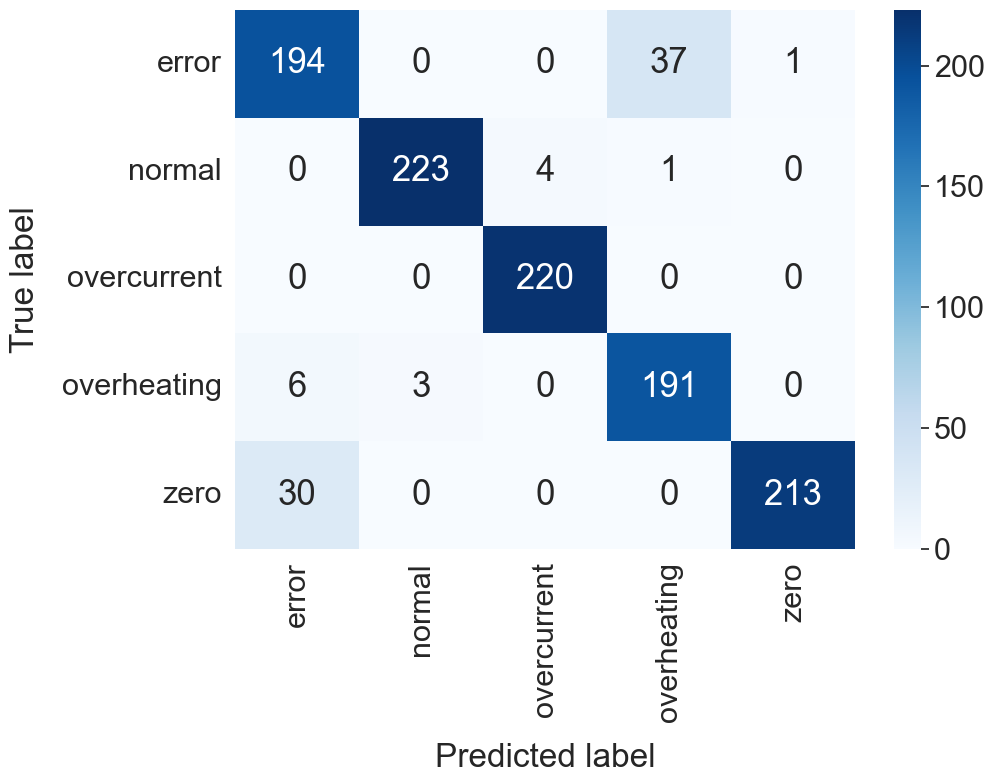

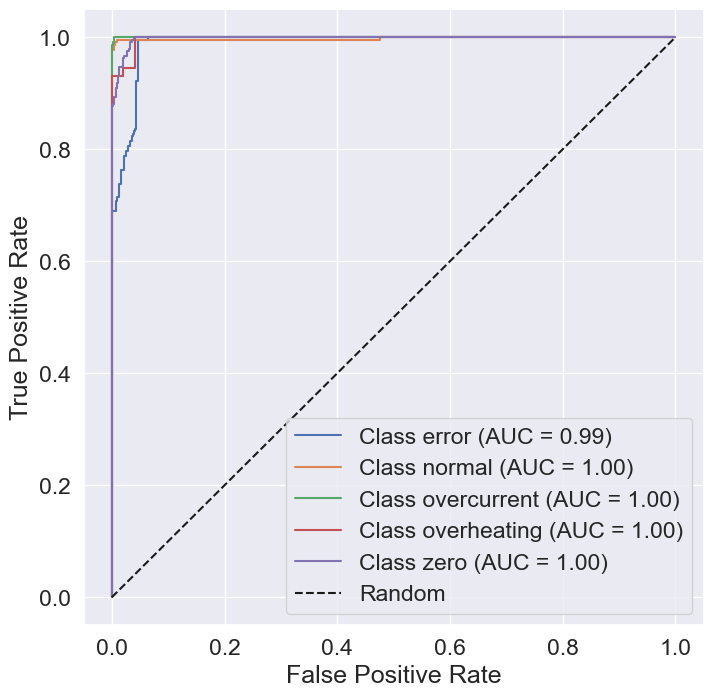

In [11]:
svm_val_conf_matrix = evaludation_tool.evaluate_and_print_results(y_pred=svm_y_pred_val, y_pred_proba=svm_y_pred_proba_val, y_test=y_validation, label_encoder=label_encoder)
evaludation_tool.plot_conf_matrix(conf_matrix=svm_val_conf_matrix)
evaludation_tool.plot_auc_curve(y_pred_proba=svm_y_pred_proba_val, y_test=y_validation, label_encoder=label_encoder)

In [12]:
svm_y_pred = svm_model_current.predict(X_test)
svm_y_pred_proba = svm_model_current.predict_proba(X_test)

              precision    recall  f1-score   support

       error       0.90      0.85      0.87       413
      normal       0.97      1.00      0.98       390
 overcurrent       1.00      1.00      1.00       421
 overheating       0.85      0.94      0.90       379
        zero       1.00      0.92      0.96       409

    accuracy                           0.94      2012
   macro avg       0.94      0.94      0.94      2012
weighted avg       0.94      0.94      0.94      2012


Custom reports
Precision: 0.9435589438877191
Recall: 0.9432175119576878
Accuracy: 0.9428429423459245
F1-Score (Macro): 0.9424717277856394
Macro-average AUC (SVM): 0.9978114996582319


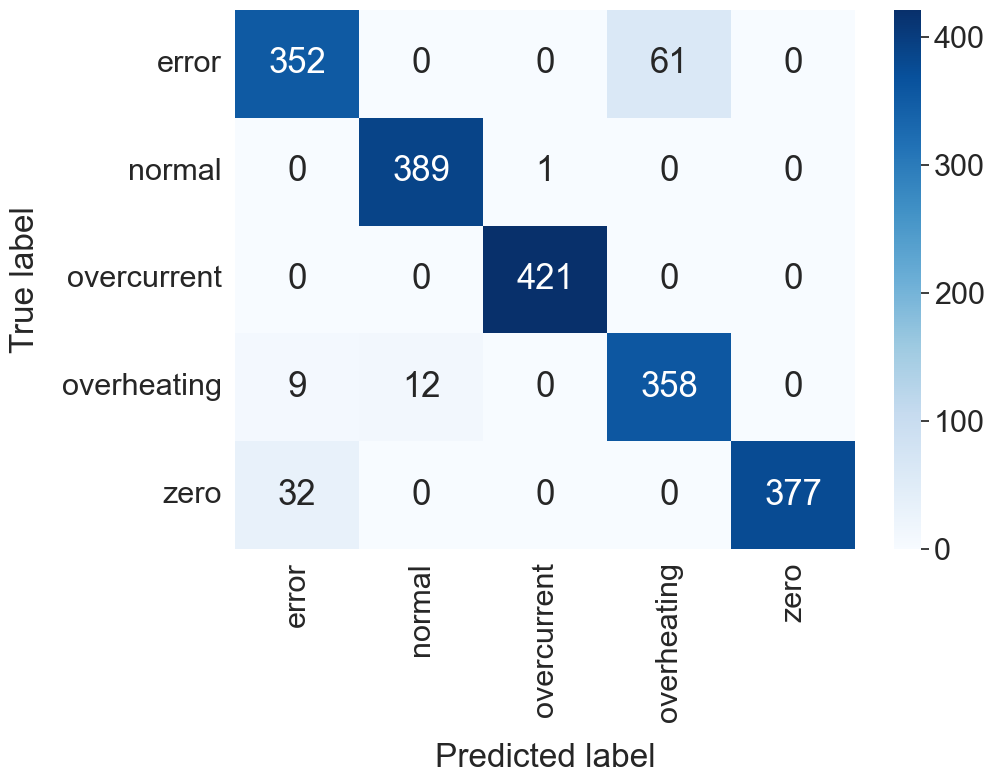

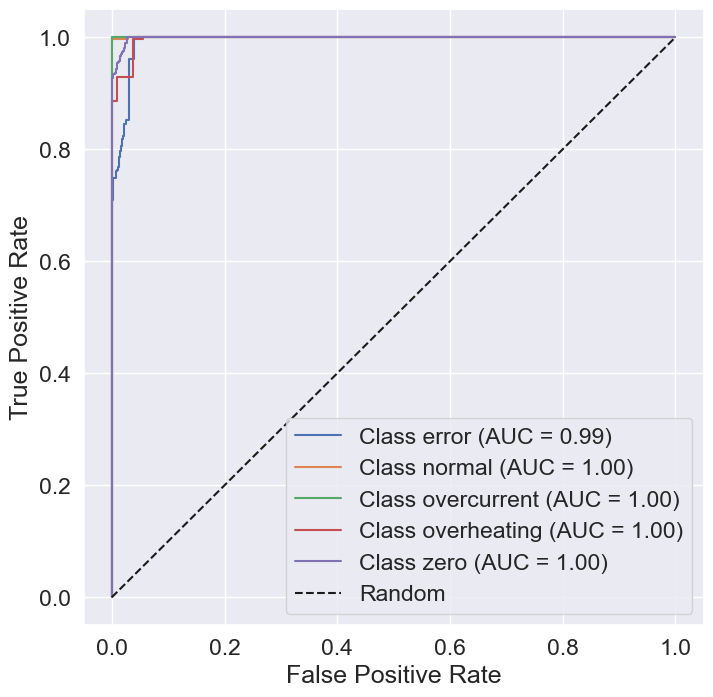

In [13]:
svm_conf_matrix = evaludation_tool.evaluate_and_print_results(y_pred=svm_y_pred, y_pred_proba=svm_y_pred_proba, y_test=y_test, label_encoder=label_encoder)
evaludation_tool.plot_conf_matrix(conf_matrix=svm_conf_matrix)
evaludation_tool.plot_auc_curve(y_pred_proba=svm_y_pred_proba, y_test=y_test, label_encoder=label_encoder)

# Random Forest

## Xây dựng mô hình

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_current = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
# Tạo mô hình SVM
rf_current.fit(X_Train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [19]:
rf_memory_size = mem_cal.bytes_to_kb(mem_cal.deep_sizeof(rf_current, verbose=True))
print("Instance state: {} kB".format(rf_memory_size))

| Attribute | `type(v)` | `deep_sizeof(v)` |
|---|---|---|
| _abc_impl | <class '_abc._abc_data'> | 16 |
| _estimator_type | <class 'str'> | 59 |
| _parameter_constraints | <class 'dict'> | 16 |
| _required_parameters | <class 'list'> | 40 |
| base_estimator | <class 'str'> | 59 |
| bootstrap | <class 'bool'> | 28 |
| ccp_alpha | <class 'float'> | 24 |
| class_weight | <class 'NoneType'> | 16 |
| classes_ | <class 'numpy.ndarray'> | 192 |
| criterion | <class 'str'> | 56 |
| estimator | <class 'sklearn.tree._classes.DecisionTreeClassifier'> | 421 |
| estimator_ | <class 'sklearn.tree._classes.DecisionTreeClassifier'> | 421 |
| estimator_params | <class 'tuple'> | 657 |
| estimators_ | <class 'list'> | 1815652 |
| max_depth | <class 'NoneType'> | 16 |
| max_features | <class 'str'> | 53 |
| max_leaf_nodes | <class 'NoneType'> | 16 |
| max_samples | <class 'NoneType'> | 16 |
| min_impurity_decrease | <class 'float'> | 24 |
| min_samples_leaf | <class 'int'> | 28 |
| min_samples_split | <

/home/mrcong/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


## Đánh giá mô hình

In [16]:
rf_y_pred_val = rf_current.predict(X_validation)
rf_y_pred_proba_val = rf_current.predict_proba(X_validation)

              precision    recall  f1-score   support

       error       0.89      0.98      0.93       232
      normal       1.00      0.98      0.99       228
 overcurrent       0.98      1.00      0.99       220
 overheating       0.99      0.99      0.99       200
        zero       0.98      0.89      0.93       243

    accuracy                           0.97      1123
   macro avg       0.97      0.97      0.97      1123
weighted avg       0.97      0.97      0.97      1123


Custom reports
Precision: 0.9696642244043818
Recall: 0.9689045133054005
Accuracy: 0.9670525378450578
F1-Score (Macro): 0.9684788456848077
Macro-average AUC (SVM): 0.9983596794001965


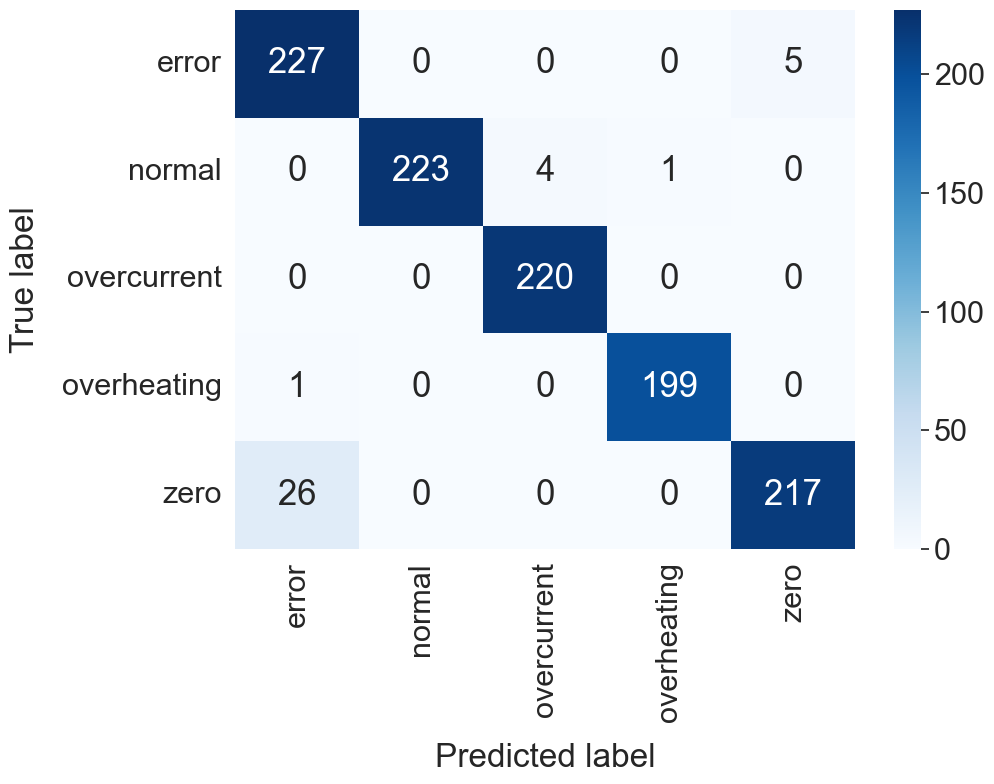

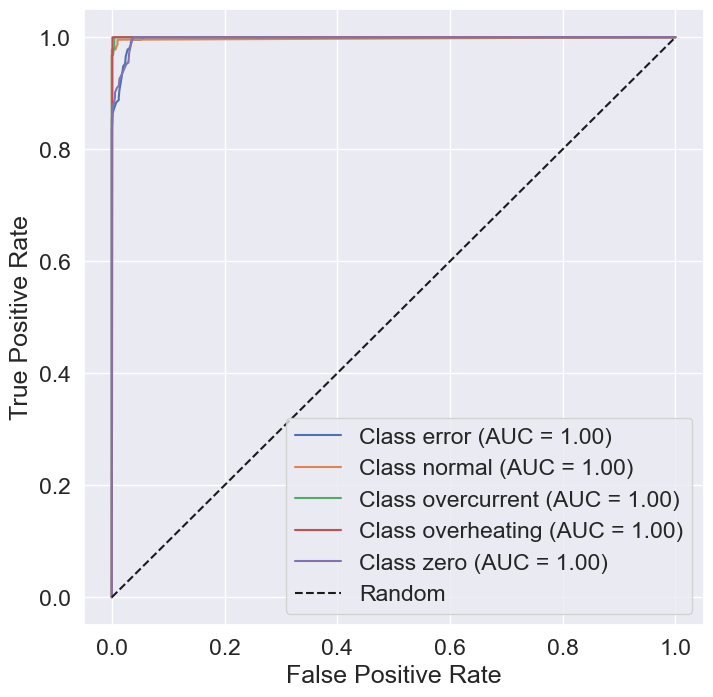

In [17]:
rf_val_cm = evaludation_tool.evaluate_and_print_results(y_pred=rf_y_pred_val, y_pred_proba=rf_y_pred_proba_val, y_test=y_validation, label_encoder=label_encoder)
evaludation_tool.plot_conf_matrix(conf_matrix=rf_val_cm)
evaludation_tool.plot_auc_curve(y_pred_proba=rf_y_pred_proba_val, y_test=y_validation, label_encoder=label_encoder)

In [18]:
rf_y_pred = rf_current.predict(X_test)
rf_y_pred_proba = rf_current.predict_proba(X_test)

              precision    recall  f1-score   support

       error       0.93      0.99      0.96       413
      normal       1.00      1.00      1.00       390
 overcurrent       1.00      1.00      1.00       421
 overheating       1.00      0.99      1.00       379
        zero       0.99      0.93      0.96       409

    accuracy                           0.98      2012
   macro avg       0.98      0.98      0.98      2012
weighted avg       0.98      0.98      0.98      2012


Custom reports
Precision: 0.9829248218494291
Recall: 0.981824797860994
Accuracy: 0.981610337972167
F1-Score (Macro): 0.9819601402025148
Macro-average AUC (SVM): 0.9995654488512395


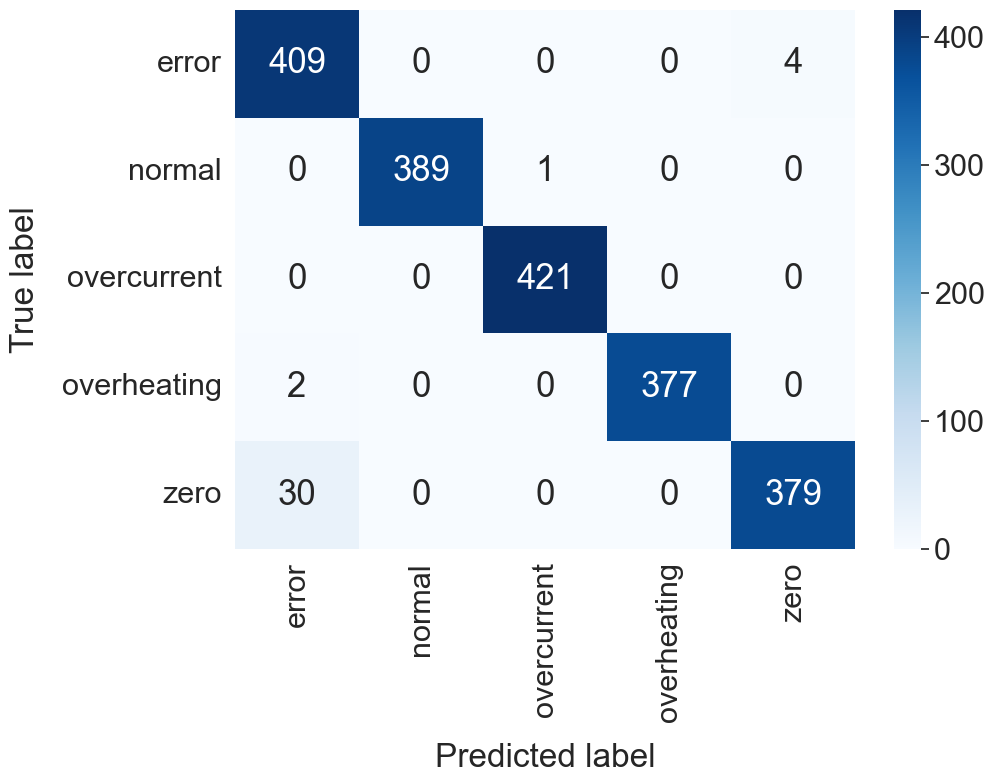

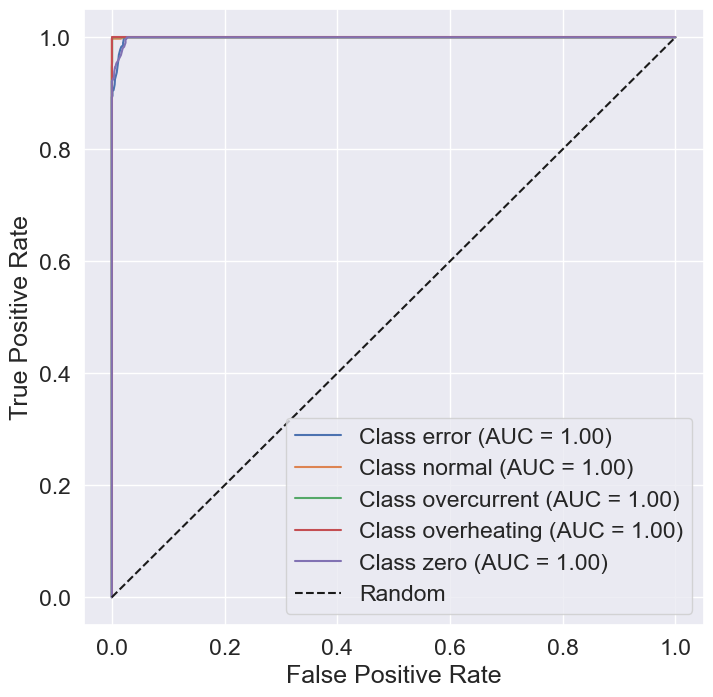

In [19]:
rf_cm = evaludation_tool.evaluate_and_print_results(y_pred=rf_y_pred, y_pred_proba=rf_y_pred_proba, y_test=y_test, label_encoder=label_encoder)
evaludation_tool.plot_conf_matrix(conf_matrix=rf_cm)
evaludation_tool.plot_auc_curve(y_pred_proba=rf_y_pred_proba, y_test=y_test, label_encoder=label_encoder)

# XgBoost

## Xây dựng mô hình

In [14]:
from xgboost import XGBClassifier
xgboost_current = XGBClassifier(objective='binary:logistic', tree_method="gpu_hist")
xgboost_current.fit(X_Train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [20]:
xgboost_memory_size = mem_cal.bytes_to_kb(mem_cal.deep_sizeof(xgboost_current, verbose=True)) 
print("Instance state: {} kB".format(xgboost_memory_size))

| Attribute | `type(v)` | `deep_sizeof(v)` |
|---|---|---|
| _Booster | <class 'xgboost.core.Booster'> | 226 |
| _estimator_type | <class 'str'> | 59 |
| base_score | <class 'NoneType'> | 16 |
| booster | <class 'NoneType'> | 16 |
| callbacks | <class 'NoneType'> | 16 |
| classes_ | <class 'numpy.ndarray'> | 192 |
| colsample_bylevel | <class 'NoneType'> | 16 |
| colsample_bynode | <class 'NoneType'> | 16 |
| colsample_bytree | <class 'NoneType'> | 16 |
| early_stopping_rounds | <class 'NoneType'> | 16 |
| enable_categorical | <class 'bool'> | 28 |
| eval_metric | <class 'NoneType'> | 16 |
| feature_types | <class 'NoneType'> | 16 |
| gamma | <class 'NoneType'> | 16 |
| gpu_id | <class 'NoneType'> | 16 |
| grow_policy | <class 'NoneType'> | 16 |
| importance_type | <class 'NoneType'> | 16 |
| interaction_constraints | <class 'NoneType'> | 16 |
| learning_rate | <class 'NoneType'> | 16 |
| max_bin | <class 'NoneType'> | 16 |
| max_cat_threshold | <class 'NoneType'> | 16 |
| max_cat_to_o

In [16]:
dir(xgboost_current)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_can_use_inplace_predict',
 '_check_feature_names',
 '_check_n_features',
 '_configure_fit',
 '_create_dmatrix',
 '_early_stopping_attr',
 '_estimator_type',
 '_get_default_requests',
 '_get_iteration_range',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',
 '_validate_data',
 '_validate_params',
 'apply',
 'base_score',
 'best_iteration',
 'best_ntree_

## Đánh giá mô hình

In [22]:
xgb_y_pred_val = xgboost_current.predict(X_validation)
xgb_y_pred_proba_val = xgboost_current.predict_proba(X_validation)

              precision    recall  f1-score   support

       error       0.89      0.93      0.91       232
      normal       0.98      0.98      0.98       228
 overcurrent       0.99      0.99      0.99       220
 overheating       0.97      0.99      0.98       200
        zero       0.95      0.89      0.92       243

    accuracy                           0.96      1123
   macro avg       0.96      0.96      0.96      1123
weighted avg       0.96      0.96      0.96      1123


Custom reports
Precision: 0.9567572168894994
Recall: 0.9574807658489852
Accuracy: 0.9554764024933214
F1-Score (Macro): 0.9568304866931567
Macro-average AUC (SVM): 0.997802763978091


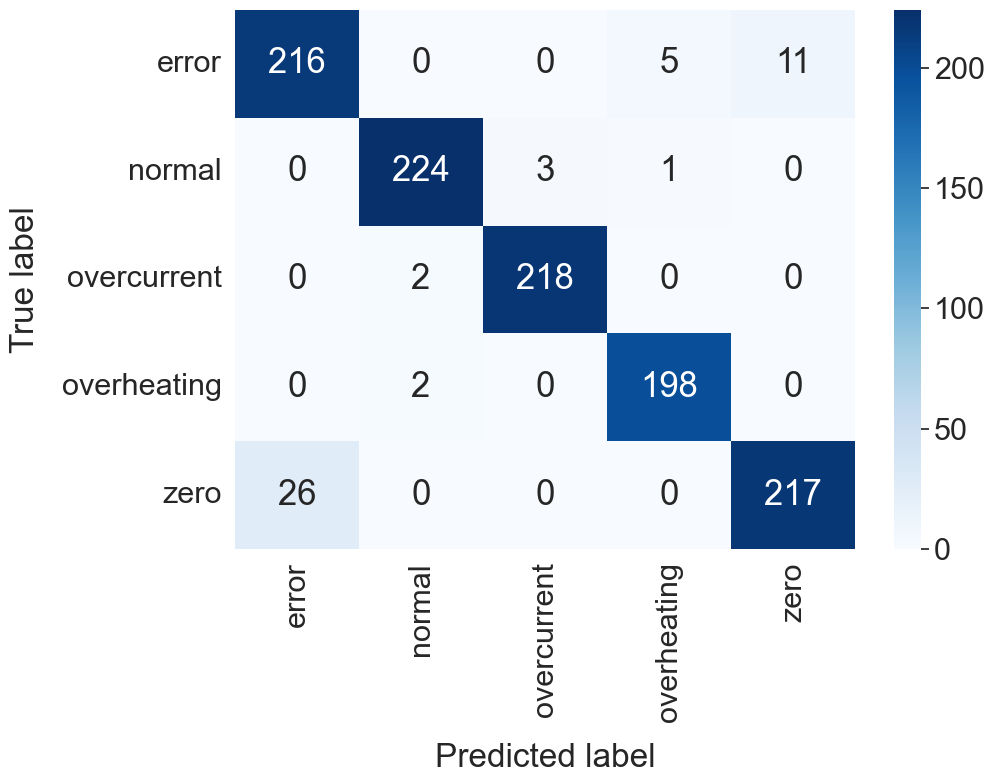

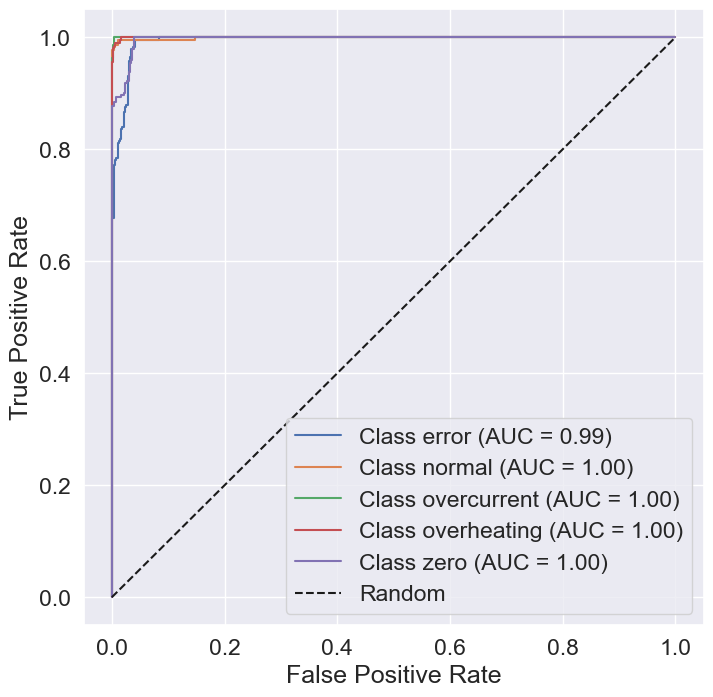

In [23]:
xgb_val_cm = evaludation_tool.evaluate_and_print_results(y_pred=xgb_y_pred_val, y_pred_proba=xgb_y_pred_proba_val, y_test=y_validation, label_encoder=label_encoder)
evaludation_tool.plot_conf_matrix(conf_matrix=xgb_val_cm)
evaludation_tool.plot_auc_curve(y_pred_proba=xgb_y_pred_proba_val, y_test=y_validation, label_encoder=label_encoder)

In [24]:
xgb_y_pred = xgboost_current.predict(X_test)
xgb_y_pred_proba = xgboost_current.predict_proba(X_test)

              precision    recall  f1-score   support

       error       0.93      0.96      0.94       413
      normal       0.95      1.00      0.97       390
 overcurrent       1.00      0.97      0.99       421
 overheating       0.99      0.96      0.98       379
        zero       0.97      0.93      0.95       409

    accuracy                           0.97      2012
   macro avg       0.97      0.97      0.97      2012
weighted avg       0.97      0.97      0.97      2012


Custom reports
Precision: 0.9671279046236725
Recall: 0.9664068069802051
Accuracy: 0.9662027833001988
F1-Score (Macro): 0.9664430478817675
Macro-average AUC (SVM): 0.9992995502692743


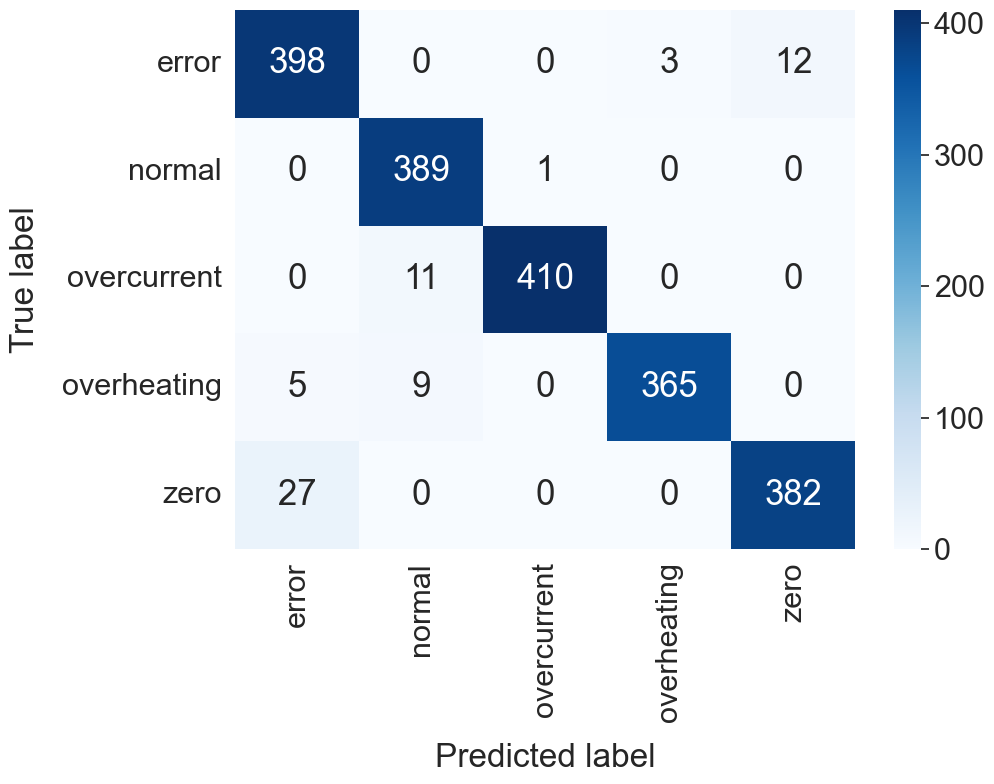

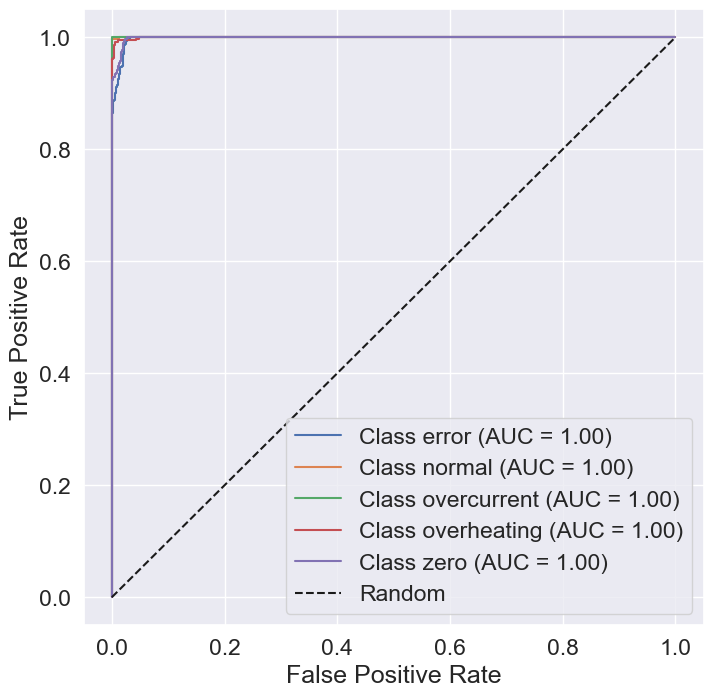

In [25]:
xgb_test_cm = evaludation_tool.evaluate_and_print_results(y_pred=xgb_y_pred, y_pred_proba=xgb_y_pred_proba, y_test=y_test, label_encoder=label_encoder)
evaludation_tool.plot_conf_matrix(conf_matrix=xgb_test_cm)
evaludation_tool.plot_auc_curve(y_pred_proba=xgb_y_pred_proba, y_test=y_test, label_encoder=label_encoder)

# Overfitting check

In [26]:
svm_train_accuracy = accuracy_score(y_pred=svm_model_current.predict(X_Train), y_true=y_train)
svm_validation_accuracy = accuracy_score(y_pred=svm_y_pred_val, y_true=y_validation) 
svm_test_accuracy = accuracy_score(y_pred=svm_y_pred, y_true=y_test)
print(f"SVM train error: {1-svm_train_accuracy}, validation error: {1-svm_validation_accuracy}, test error: {1-svm_test_accuracy}")

SVM train error: 0.05740107474352707, validation error: 0.07301869991095278, test error: 0.05715705765407553


In [27]:
rf_train_accuracy = accuracy_score(y_pred=rf_current.predict(X_Train), y_true=y_train)
rf_val_ac = accuracy_score(y_pred=rf_y_pred_val, y_true=y_validation)
rf_test_ac = accuracy_score(y_pred=rf_y_pred, y_true=y_test)
print(f"RF train error: {1-rf_train_accuracy}, validation error: {1-rf_val_ac}, test error: {1-rf_test_ac}")

RF train error: 0.0006106497313140835, validation error: 0.03294746215494215, test error: 0.018389662027832987


In [28]:
xgb_train_accuracy = accuracy_score(y_pred=xgboost_current.predict(X_Train), y_true=y_train)
xgb_val_ac = accuracy_score(y_pred=xgb_y_pred_val, y_true=y_validation)
xgb_test_ac = accuracy_score(y_pred=xgb_y_pred, y_true=y_test)
print(f"XgBoost train error: {1-xgb_train_accuracy}, SVM validation error: {1-xgb_val_ac}, SVM test error: {1-xgb_test_ac}")

XgBoost train error: 0.0006106497313140835, SVM validation error: 0.04452359750667856, SVM test error: 0.03379721669980118
